#

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

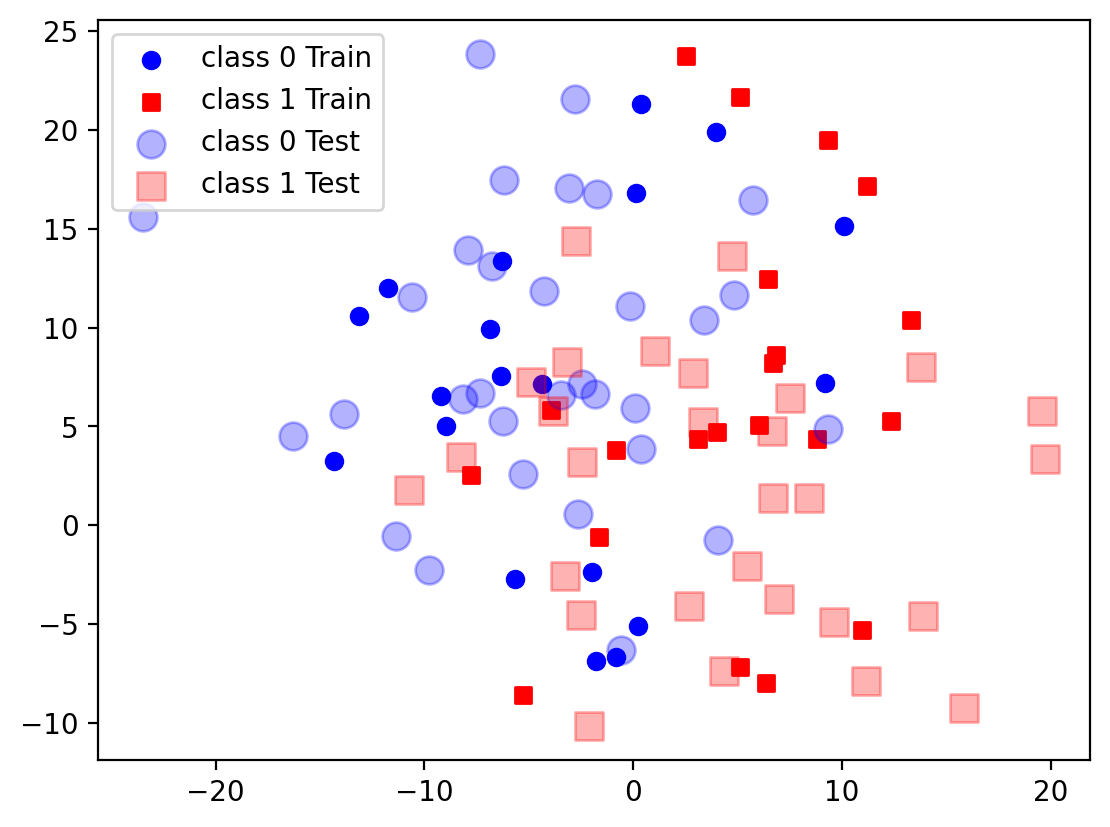

In [78]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42, cluster_std=8.0)

train_samples = 40
X_train = X[:train_samples]
y_train = y[:train_samples]

X_test = X[train_samples:]
y_test = y[train_samples:]

# Plot training fata with small markers
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='o', label='class 0 Train', color='b')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='s', label='class 1 Train', color='r')

# Plot test data with larger markers
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='o', s=100, label='class 0 Test', color='b', alpha=0.3)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='s', s=100, label='class 1 Test', color='r', alpha=0.3)

plt.legend()

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none', max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression(max_iter=1000, penalty='none')

In [66]:
pred_test = lr.predict_proba(X_test)

In [67]:
pred_test[:5]

array([[0.37896698, 0.62103302],
       [0.0502929 , 0.9497071 ],
       [0.69240206, 0.30759794],
       [0.1239149 , 0.8760851 ],
       [0.27543045, 0.72456955]])

In [68]:
df = pd.DataFrame(pred_test, columns=['class 0', 'class 1'])
df['gt'] = y_test

In [69]:
df.head()

In [70]:
df['pred'] = (df['class 1'] > 0.5).astype(int)


In [71]:
df.head()

In [95]:
def confusion_p_r(model, X, y, threshold=0.5, eps=1e-8, img=False):
    pred_prob = model.predict_proba(X)
    pred = (pred_prob[:, 1] >= threshold).astype(int)
    df = pd.DataFrame(pred_prob, columns=['class 0', 'class1'])
    df['gt'] = y
    df['pred'] = pred
    TP = ((df['gt'] == 1) & (df['pred'] == 1)).sum()
    TN = ((df['gt'] == 0) & (df['pred'] == 0)).sum()
    FP = ((df['gt'] == 0) & (df['pred'] == 1)).sum()
    FN = ((df['gt'] == 1) & (df['pred'] == 0)).sum()
    precision = TP / (TP + FP + eps)
    recall = TP / (TP + FN + eps)
    # plot confusion matrix
    if img:
        # Compute confusion matrix
        cm = confusion_matrix(y, pred)
        print(pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1']))
    return precision, recall

In [96]:
confusion_p_r(lr, X_test, y_test, img=True)

        Pred 0  Pred 1
True 0      24       7
True 1       9      20

(0.7407407404663923, 0.6896551721759809)

In [97]:
for threshold in np.linspace(0, 1, 21):
    precision, recall = confusion_p_r(lr, X_test, y_test, threshold)
    print(f'Threshold: {threshold:.2f} Precision: {precision:.2f} Recall: {recall:.2f}')

Threshold: 0.00 Precision: 0.48 Recall: 1.00
Threshold: 0.05 Precision: 0.51 Recall: 1.00
Threshold: 0.10 Precision: 0.53 Recall: 1.00
Threshold: 0.15 Precision: 0.58 Recall: 0.97
Threshold: 0.20 Precision: 0.59 Recall: 0.93
Threshold: 0.25 Precision: 0.63 Recall: 0.90
Threshold: 0.30 Precision: 0.65 Recall: 0.83
Threshold: 0.35 Precision: 0.66 Recall: 0.79
Threshold: 0.40 Precision: 0.69 Recall: 0.76
Threshold: 0.45 Precision: 0.72 Recall: 0.72
Threshold: 0.50 Precision: 0.74 Recall: 0.69
Threshold: 0.55 Precision: 0.76 Recall: 0.66
Threshold: 0.60 Precision: 0.78 Recall: 0.62
Threshold: 0.65 Precision: 0.81 Recall: 0.59
Threshold: 0.70 Precision: 0.88 Recall: 0.52
Threshold: 0.75 Precision: 0.87 Recall: 0.48
Threshold: 0.80 Precision: 0.93 Recall: 0.48
Threshold: 0.85 Precision: 0.90 Recall: 0.31
Threshold: 0.90 Precision: 1.00 Recall: 0.24
Threshold: 0.95 Precision: 1.00 Recall: 0.14
Threshold: 1.00 Precision: 0.00 Recall: 0.00

In [99]:
confusion_p_r(lr, X_test, y_test, threshold=0.99, img=True)

        Pred 0  Pred 1
True 0      31       0
True 1      29       0

(0.0, 0.0)

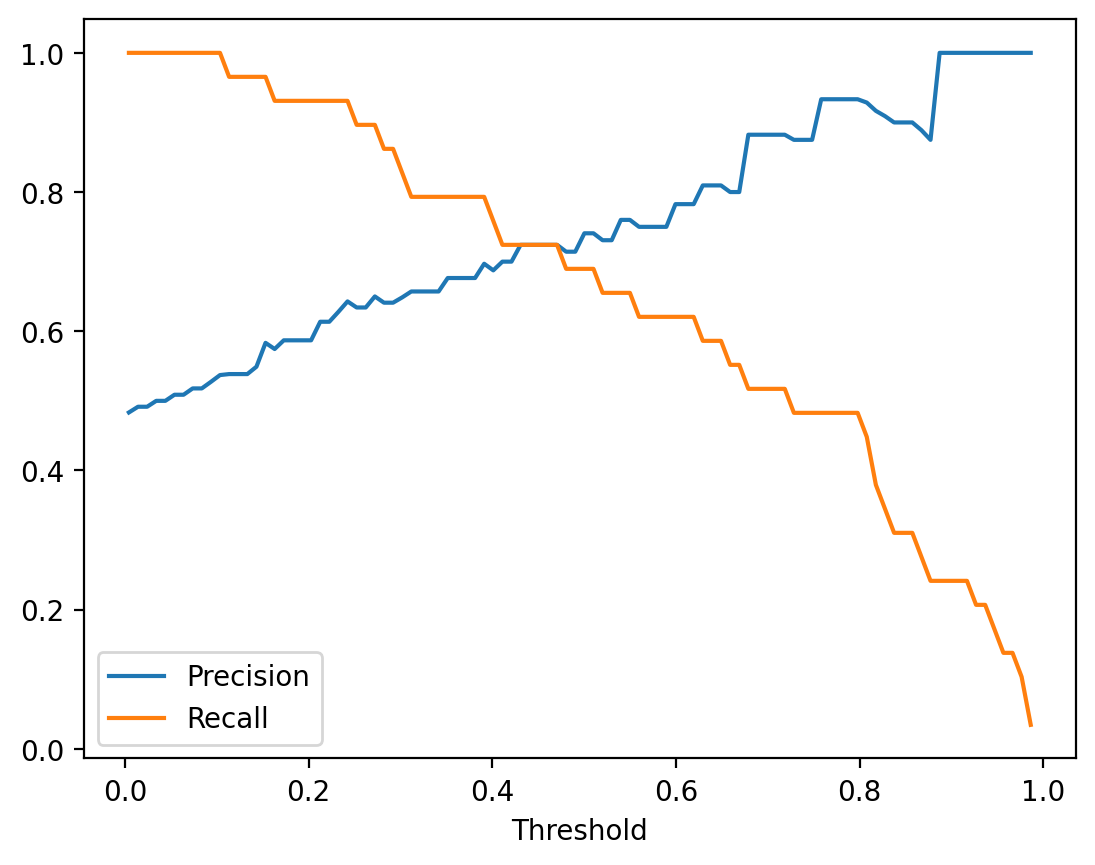

In [111]:
# Plo9t Precicion curve
min_prob = lr.predict_proba(X_test)[:, 1].min()
max_prob = lr.predict_proba(X_test)[:, 1].max()
thresholds = np.linspace(min_prob, max_prob, 100)
precisions = []
recalls = []

for threshold in thresholds:
    precision, recall = confusion_p_r(lr, X_test, y_test, threshold)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')

plt.xlabel('Threshold')
plt.legend()

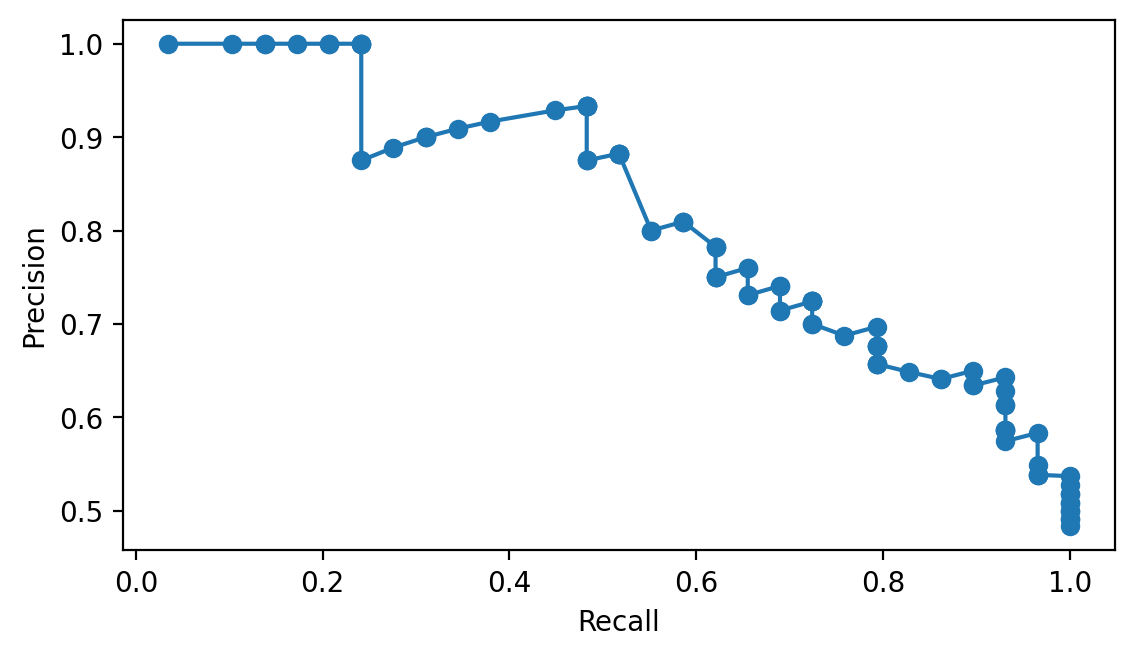

In [112]:
# Plot Precision-Recall curve
plt.plot(recalls, precisions, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
# make plot square
plt.gca().set_aspect('equal', adjustable='box')

Text(0, 0.5, 'Precision')

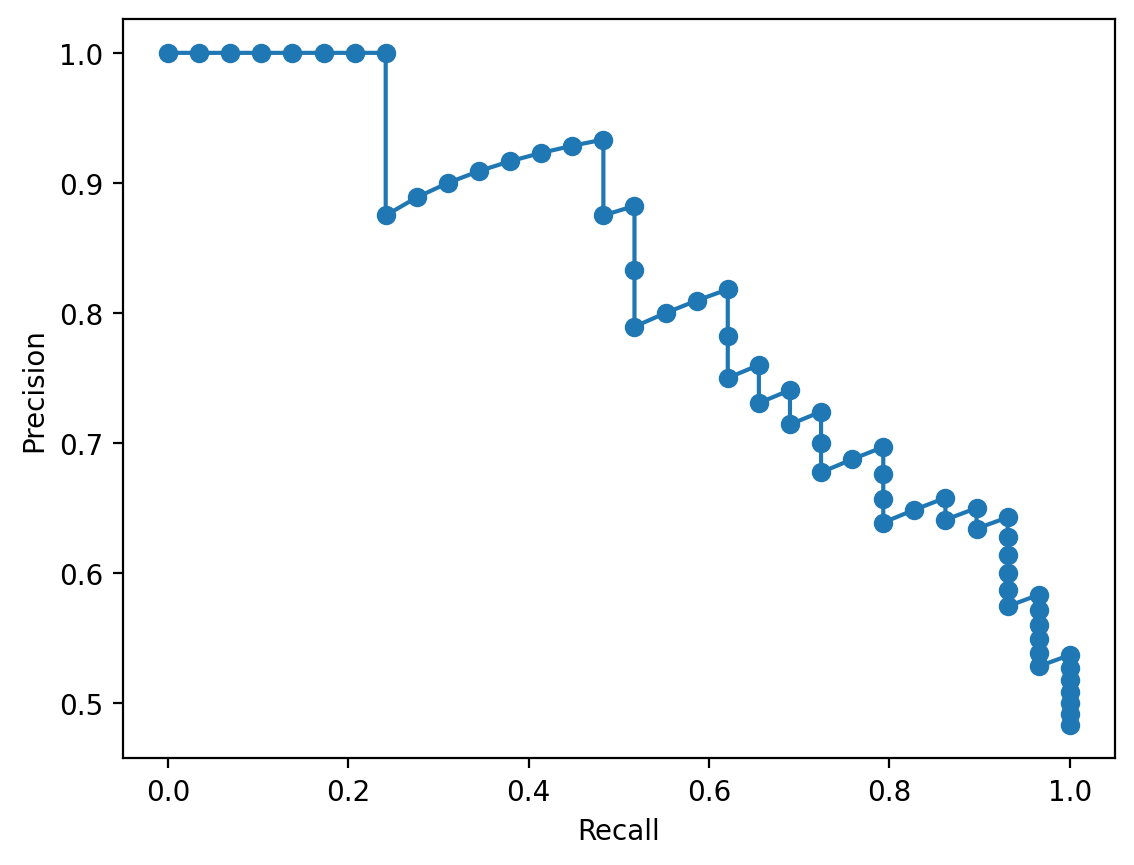

In [113]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')

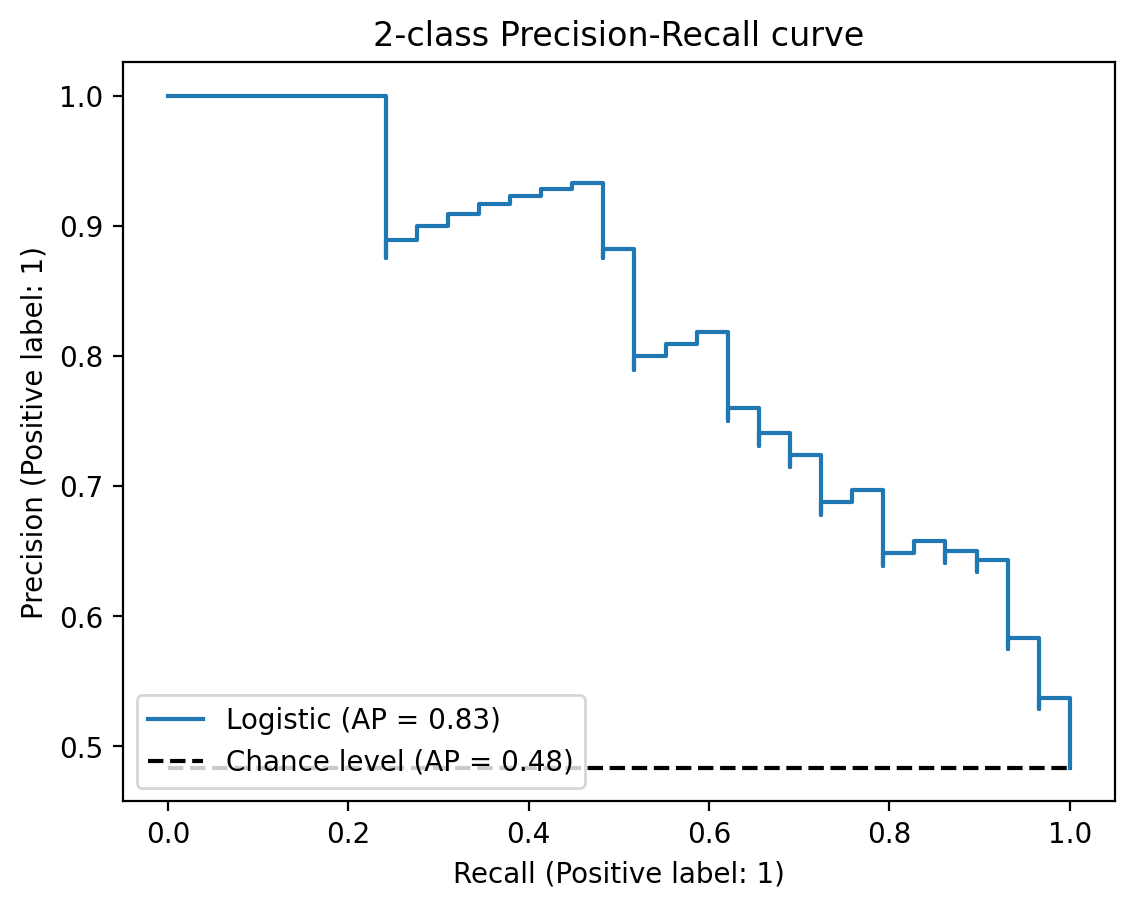

In [114]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    lr, X_test, y_test, name="Logistic", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [119]:
(y_train==0).sum(), (y_train==1).sum(), (y_test==0).sum(), (y_test==1).sum()

(19, 21, 31, 29)

In [121]:
21/(19+21), 29/(29+31)

(0.525, 0.48333333333333334)

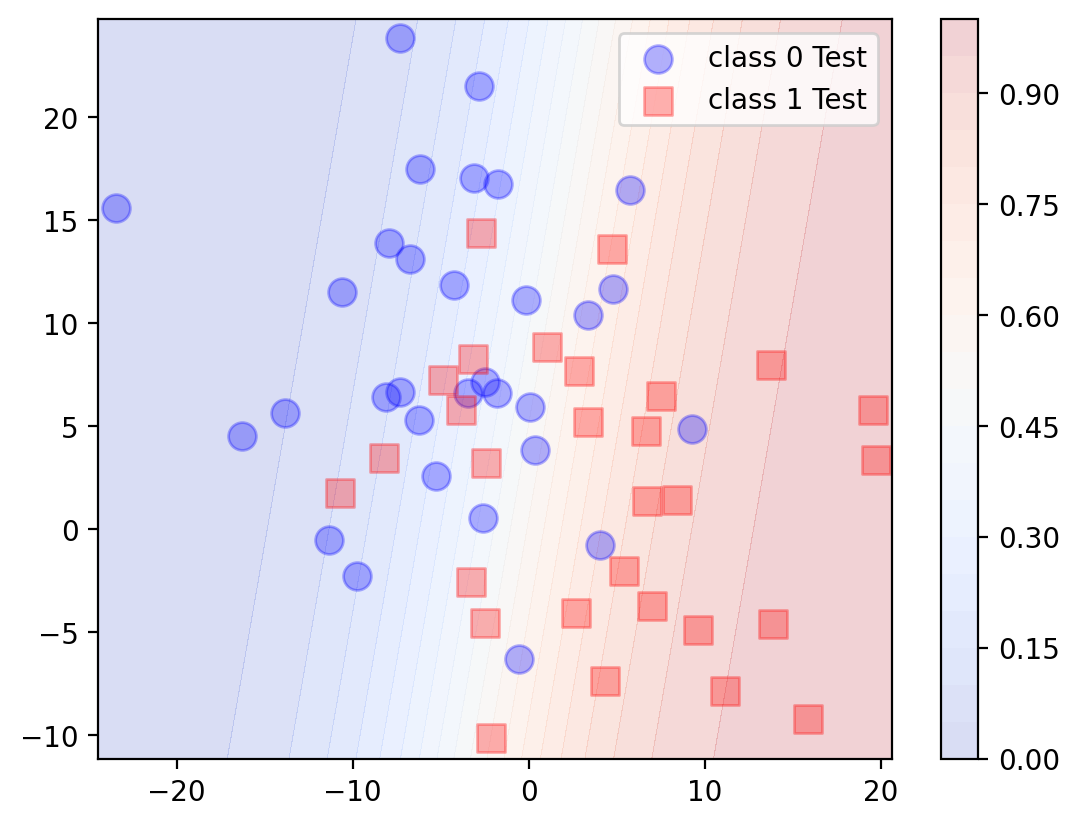

In [104]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm', levels=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Colorbar
plt.colorbar()

# Plot test data with larger markers
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='o', s=100, label='class 0 Test', color='b', alpha=0.3)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='s', s=100, label='class 1 Test', color='r', alpha=0.3)

plt.legend()